<a href="https://colab.research.google.com/github/JeetRoy97/Democracy-2.0/blob/main/topic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyLDAvis

In [ ]:
import json
import pandas as pd
import nltk
nltk.download('stopwords')
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
import gensim.corpora as corpora 
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [ ]:
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#mallet_path = r'/content/drive/MyDrive/Research/mallet-2.0.8/bin/mallet/'
stop_words = nltk.corpus.stopwords.words('english')
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Research/Other datasets/df_en.csv")
df_en = df[:][df['lang'] == 'ENGLISH']
df_en = df_en.reset_index(drop=True)
#data = pd.read_json('Amazon_Instant_Video_5.json',lines=True)
reviews_df = df_en
reviews_text = df_en['preprocessed'].tolist()

In [ ]:
reviews_df = reviews_df.dropna()
print(len(reviews_df))

2794


In [ ]:
df_reviews= reviews_df
# Create document-term matrix
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN' 
    is_adj = lambda pos: pos[:2] == 'ADJ' 
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos) or is_adj(pos)] 
    return ' '.join(all_nouns)

In [ ]:

len(df_reviews)

2794

In [ ]:
df_reviews['review_ls'] = df_reviews['preprocessed'].apply(lambda x: x.split(" "))
df_reviews.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,lang,preprocessed,review_ls
0,"Under Income Tax, all medical related deductio...",ENGLISH,income tax medical relate deductions club much...,"[income, tax, medical, relate, deductions, clu..."
1,Rental deduction and deduction towards own hou...,ENGLISH,rental deduction deduction towards house selfo...,"[rental, deduction, deduction, towards, house,..."
2,House Rent Income and interest expense to be t...,ENGLISH,house rent income interest expense treat separ...,"[house, rent, income, interest, expense, treat..."
3,The deductions and exemptions related to Housi...,ENGLISH,deductions exemptions relate house individuals...,"[deductions, exemptions, relate, house, indivi..."
4,"Salaried people with an allowance ""named"" Hous...",ENGLISH,salaried people allowance name house rent allo...,"[salaried, people, allowance, name, house, ren..."


In [ ]:
import itertools
reviews = df_reviews['review_ls']
print("Total reviews: ", len(reviews))
reviews = list(itertools.chain(*reviews))
print("Total words in reviews:", len(reviews))

Total reviews:  2794
Total words in reviews: 32934


In [ ]:
stopwords_ls = list(set(stopwords.words("english")))
reviews = [word for word in reviews if word not in stopwords_ls]

In [ ]:
print("After stopwords removal",len(reviews))

After stopwords removal 32496


In [ ]:
import collections
words_frequency = collections.Counter(reviews)
# top 10 most frequent words in reviews
print("Most common positive words:", words_frequency.most_common(30))


Most common positive words: [('tax', 623), ('government', 353), ('increase', 265), ('income', 246), ('india', 230), ('make', 218), ('people', 214), ('budget', 204), ('also', 197), ('give', 196), ('like', 177), ('please', 174), ('get', 163), ('pay', 155), ('need', 144), ('reduce', 125), ('one', 121), ('gst', 121), ('limit', 120), ('money', 120), ('would', 110), ('help', 107), ('scheme', 105), ('request', 104), ('provide', 103), ('bank', 102), ('work', 101), ('take', 98), ('country', 98), ('interest', 94)]


In [ ]:
freq_words_df = pd.DataFrame(words_frequency.most_common(15),
                                     columns=["Word", "Frequency"])
print(freq_words_df)

          Word  Frequency
0          tax        623
1   government        353
2     increase        265
3       income        246
4        india        230
5         make        218
6       people        214
7       budget        204
8         also        197
9         give        196
10        like        177
11      please        174
12         get        163
13         pay        155
14        need        144


In [ ]:
new_stop = list(freq_words_df['Word'])

In [ ]:
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people','country'
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said', 'please']                

In [ ]:
stopwords_ls = list(set(stopwords.words("english")))
stopwords_ls.extend(new_stop)
stopwords_ls.extend(add_stop_words)
reviews = [word for word in reviews if word not in stopwords_ls]
print(len(reviews))

28721


In [ ]:
clean_list = []
for tokens in df_reviews['review_ls']:
  clean = []
  for word in tokens:
    if word not in stopwords_ls:
      clean.append(word)
    #print(clean)
  clean_list.append(clean)

In [ ]:
df_reviews['cleaned_tokens'] = clean_list
import itertools
reviews = df_reviews['cleaned_tokens']
print("Total reviews: ", len(reviews))
reviews = list(itertools.chain(*reviews))
print("Total words in reviews:", len(reviews))

Total reviews:  2794
Total words in reviews: 28721


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_reviews = df_reviews.dropna()
df_reviews = df_reviews.reset_index(drop=True)
len(df_reviews)

2794

In [ ]:
sent = []
for tokens in df_reviews['cleaned_tokens']:
  listToStr = ' '.join(map(str, tokens))
  sent.append(listToStr)

In [ ]:
df_reviews['cleaned_sentences'] = sent

In [ ]:
data_nouns = pd.DataFrame(df_reviews.preprocessed.apply(nouns))

In [ ]:
len(stopwords_ls)

210

In [ ]:
# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people','country'
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said', 'please']                  
#stop_words = text.ENGLISH_STOP_WORDS.union(c)
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [ ]:
data_nouns

,preprocessed
0,income tax relate deductions limit
1,deduction deduction towards house selfoccupati...
2,house income interest expense treat section
3,deductions exemptions house individuals sectio...
4,people name house rent allowance section regar...
...,...
2789,accord opinion revise years
2790,rise price band people position express feel
2791,government matter
2792,ignore message


In [ ]:
cv = CountVectorizer(stop_words=stopwords_ls)
data_cv = cv.fit_transform(data_nouns.preprocessed)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = df_reviews.index

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")


In [ ]:
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')

from gensim import matutils, models
import scipy.sparse

tdm = data.transpose()
#tdm.head()

In [ ]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [ ]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
#tdm.head()

In [ ]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
from gensim import corpora
cv = pickle.load(open("cv_stop.pkl", "rb"))
word2id = dict((v, k) for k, v in cv.vocabulary_.items())
d = corpora.Dictionary()
d.id2token = id2word
d.token2id = word2id

In [ ]:
#!pip uninstall gensim

In [ ]:
!pip install gensim==3.8.3

In [ ]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3)
#lda.print_topics()

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=corpus, texts=df_reviews.title)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.8237,"interest, limit, amount, country, job, bank, money, scheme, citizens, help","Under Income Tax, all medical related deductions to be clubbed with a much higher overall limit."
1,1,1.0,0.9123,"interest, limit, amount, country, job, bank, money, scheme, citizens, help",Rental deduction and deduction towards own housing for self-occupation should be clubbed and giv...
2,2,1.0,0.8781,"interest, limit, amount, country, job, bank, money, scheme, citizens, help",House Rent Income and interest expense to be treated separately in the existing section.
3,3,1.0,0.8949,"interest, limit, amount, country, job, bank, money, scheme, citizens, help",The deductions and exemptions related to Housing for Individuals are spread across many sections...
4,4,0.0,0.9196,"fund, work, cost, train, sport, home, gst, company, fee, water","Salaried people with an allowance ""named"" House Rent Allowance get an exemption under Section 10..."
5,5,0.0,0.8843,"fund, work, cost, train, sport, home, gst, company, fee, water",Others who do not get a House Rent Allowance get a deduction under Section 80GG for the same.
6,6,1.0,0.8990,"interest, limit, amount, country, job, bank, money, scheme, citizens, help",Those who buy or build a house or repay housing loan principal get a deduction under section 80C...
7,7,1.0,0.8485,"interest, limit, amount, country, job, bank, money, scheme, citizens, help",(There is another section on affordable housing but that is specific to first time house owners ...
8,8,1.0,0.8458,"interest, limit, amount, country, job, bank, money, scheme, citizens, help",Interest paid on housing loan is deductible under Section 24.
9,9,1.0,0.9231,"interest, limit, amount, country, job, bank, money, scheme, citizens, help",All deductions related to self-occupied housing - either owned or rented - should ideally be clu...


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9710,"fund, work, cost, train, sport, home, gst, company, fee, water","when I mean balanced I mean the capital must be utilized in infrastructure,smart cities, job sec..."
1,1.0,0.9788,"interest, limit, amount, country, job, bank, money, scheme, citizens, help",mananiya madam aaj ki mehgai ke hisab se income with out tax ki limit kafi kam he pichhali sal k...
2,2.0,0.9669,"education, gst, sector, state, health, money, products, bank, price, help","Please Capture 80% property, Money, Gold,Silver, Land of All Tempels,MANDIR, MASHJID, GURUDWARA,..."


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# doc_lens = [len(d) for d in df_dominant_topic.Text]

# # Plot
# plt.figure(figsize=(16,7), dpi=160)
# plt.hist(doc_lens, bins = 1000, color='navy')
# plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
# plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
# plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
# plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
# plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

# plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
# plt.tick_params(size=16)
# plt.xticks(np.linspace(0,1000,9))
# plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
# plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.colors as mcolors
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

# for i, ax in enumerate(axes.flatten()):    
#     df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
#     doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
#     ax.hist(doc_lens, bins = 1000, color=cols[i])
#     ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
#     sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
#     ax.set(xlim=(0, 1000), xlabel='Document Word Count')
#     ax.set_ylabel('Number of Documents', color=cols[i])
#     ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

# fig.tight_layout()
# fig.subplots_adjust(top=0.90)
# plt.xticks(np.linspace(0,1000,9))
# fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
# plt.show()

In [ ]:
!pip install wordcloud

[(0, [('fund', 0.010653501), ('work', 0.0100499755), ('cost', 0.0058667264), ('train', 0.0052282056), ('sport', 0.0046868566), ('home', 0.0044177556), ('gst', 0.0043812403), ('company', 0.004213528), ('fee', 0.004081802), ('water', 0.003998225)]), (1, [('interest', 0.010797832), ('limit', 0.009739974), ('amount', 0.008083713), ('country', 0.0075965193), ('job', 0.0075614946), ('bank', 0.0074996524), ('money', 0.007429429), ('scheme', 0.007124226), ('citizens', 0.00664183), ('help', 0.0066255135)]), (2, [('education', 0.013560144), ('gst', 0.009651642), ('sector', 0.007830192), ('state', 0.0074444986), ('health', 0.0068680556), ('money', 0.006612193), ('products', 0.006527467), ('bank', 0.005813437), ('price', 0.005770967), ('help', 0.0051614936)])]


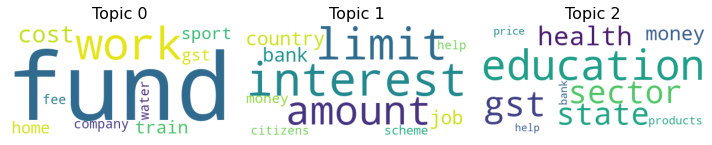

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# cloud = WordCloud(stopwords=stopwords_ls,
#                   background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=10,
#                   colormap='tab10',
#                   color_func=lambda *args, **kwargs: cols[i],
#                   prefer_horizontal=1.0)
cloud = WordCloud(background_color="white", max_words=10, contour_width=3, contour_color='steelblue')

topics = lda.show_topics(formatted=False)
print(topics)
fig, axes = plt.subplots(1, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
df_reviews['topic'] = df_dominant_topic['Dominant_Topic']

In [ ]:
df_reviews = df_reviews.dropna()
df_reviews = df_reviews.reset_index(drop=True)
df_reviews.head()

,title,lang,preprocessed,review_ls,cleaned_tokens,cleaned_sentences,topic
0,"Under Income Tax, all medical related deductions to be clubbed with a much higher overall limit.",ENGLISH,income tax medical relate deductions club much higher overall limit,"[income, tax, medical, relate, deductions, club, much, higher, overall, limit]","[medical, relate, deductions, club, much, higher, overall, limit]",medical relate deductions club much higher overall limit,1.0
1,Rental deduction and deduction towards own housing for self-occupation should be clubbed and giv...,ENGLISH,rental deduction deduction towards house selfoccupation club give higher limit,"[rental, deduction, deduction, towards, house, selfoccupation, club, give, higher, limit]","[rental, deduction, deduction, towards, house, selfoccupation, club, higher, limit]",rental deduction deduction towards house selfoccupation club higher limit,1.0
2,House Rent Income and interest expense to be treated separately in the existing section.,ENGLISH,house rent income interest expense treat separately exist section,"[house, rent, income, interest, expense, treat, separately, exist, section]","[house, rent, interest, expense, treat, separately, exist, section]",house rent interest expense treat separately exist section,1.0
3,The deductions and exemptions related to Housing for Individuals are spread across many sections...,ENGLISH,deductions exemptions relate house individuals spread across many section vary limit,"[deductions, exemptions, relate, house, individuals, spread, across, many, section, vary, limit]","[deductions, exemptions, relate, house, individuals, spread, across, many, section, vary, limit]",deductions exemptions relate house individuals spread across many section vary limit,1.0
4,"Salaried people with an allowance ""named"" House Rent Allowance get an exemption under Section 10...",ENGLISH,salaried people allowance name house rent allowance get exemption section regard rent expense pay,"[salaried, people, allowance, name, house, rent, allowance, get, exemption, section, regard, ren...","[salaried, allowance, name, house, rent, allowance, exemption, section, regard, rent, expense]",salaried allowance name house rent allowance exemption section regard rent expense,0.0


In [ ]:
gk = df_reviews.groupby('topic')

In [ ]:
l=df_reviews['topic'].unique()

In [ ]:
l

array([0., 3., 1., 2.])

In [ ]:
df_test=gk.get_group(l[0])
df_test = df_test.reset_index(drop=True)

In [ ]:
df_test

,title,lang,preprocessed,review_ls,cleaned_tokens,cleaned_sentences,topic
0,"Under Income Tax, all medical related deductions to be clubbed with a much higher overall limit.",ENGLISH,income tax medical relate deductions club much higher overall limit,"[income, tax, medical, relate, deductions, club, much, higher, overall, limit]","[medical, relate, deductions, club, much, higher, overall, limit]",medical relate deductions club much higher overall limit,0.0
1,House Rent Income and interest expense to be treated separately in the existing section.,ENGLISH,house rent income interest expense treat separately exist section,"[house, rent, income, interest, expense, treat, separately, exist, section]","[house, rent, interest, expense, treat, separately, exist, section]",house rent interest expense treat separately exist section,0.0
2,The deductions and exemptions related to Housing for Individuals are spread across many sections...,ENGLISH,deductions exemptions relate house individuals spread across many section vary limit,"[deductions, exemptions, relate, house, individuals, spread, across, many, section, vary, limit]","[deductions, exemptions, relate, house, individuals, spread, across, many, section, vary, limit]",deductions exemptions relate house individuals spread across many section vary limit,0.0
3,All deductions related to self-occupied housing - either owned or rented - should ideally be clu...,ENGLISH,deductions relate selfoccupied housingeither own rentedshould ideally club single section higher...,"[deductions, relate, selfoccupied, housingeither, own, rentedshould, ideally, club, single, sect...","[deductions, relate, selfoccupied, housingeither, rentedshould, ideally, club, single, section, ...",deductions relate selfoccupied housingeither rentedshould ideally club single section higher lim...,0.0
4,Increase education spending,ENGLISH,increase education spend,"[increase, education, spend]","[education, spend]",education spend,0.0
...,...,...,...,...,...,...,...
735,"budget should consider, for employees as whatever they earn pay tax on it.",ENGLISH,budget consider employees whatever earn pay tax,"[budget, consider, employees, whatever, earn, pay, tax]","[consider, employees, whatever, earn]",consider employees whatever earn,0.0
736,Due to rising prices and low band people are not in position to express there feelings.,ENGLISH,due rise price low band people not position express feel,"[due, rise, price, low, band, people, not, position, express, feel]","[due, rise, price, low, band, position, express, feel]",due rise price low band position express feel,0.0
737,I urge government to think over this matter.,ENGLISH,urge government think matter,"[urge, government, think, matter]","[urge, matter]",urge matter,0.0
738,Please ignore this message and need not taken it to be serious.,ENGLISH,please ignore message need not take serious,"[please, ignore, message, need, not, take, serious]","[ignore, message, take, serious]",ignore message take serious,0.0


In [ ]:
df_test.to_csv('/content/drive/MyDrive/Research/Other datasets/topic0.csv')